<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Evaluaciones/EvaluacionFinal_2023_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Examen Final:

Métodos Computacionales para físicos



Nota: La entrega del examen es a través del github en la página del curso, en el directorio asociado a cada uno.




Las aletas son sólidos que transfieren calor por conducción a lo largo de su geometría y por convección a través de su entorno. La ecuación diferencial que describe la temperatura como función de  la longitud de una  aleta viene dada por :


\begin{equation}
\frac{d^2(T-T_{\infty})}{dx^2} - \left( \frac{hp}{kAc} \right ) ^2 (T-T_{\infty})=0
\end{equation}

donde Ac es el  área de la sección transversal Ac, p es perímetro,
k es el coficiente de conducción que depende de cada material y h el coficiente de convección. La temperatura  $T_{\infty}$ es la temperatura ambiente.


![aleta](https://github.com/hernansalinas/autogradesMetodosComputacionales/blob/main/Evaluaciones/img/aleta.png?raw=true)



En general, el área de la sección transversal A y el perímetro p de una aleta
varían con x, lo cual hace que esta ecuación diferencial sea difícil de resolver. En el caso especial de una sección transversal constante y conductividad térmica constante, la ecuación diferencial se reduce a

\begin{equation}
\frac{d^2 \theta}{dx^2} - a ^2 \theta=0
\end{equation}


donde  $\theta=T-T_{\infty}$ y $a=\frac{hp}{kAc}$


Para una aleta suficientemente larga de sección transversal uniforme (Ac =
constante), la temperatura en la base de la aleta viene dada por:


\begin{equation}
\theta(0)=\theta_b=T_b-T_{\infty}
\end{equation}


 y en la punta de la aleta, tenderá a la del medio, por consiguiente $\theta$ tenderá a cero.

\begin{equation}
\theta(L)=T(L)-T_{\infty}=0
\end{equation}

La solucion  exacta viene dada por :

\begin{equation}
T(x)=T_{\infty}+(T_b-T_{\infty})e^{-x\sqrt{hp/kAc}}
\end{equation}



Considerando  una aleta rectangular muy larga, fijada a una
superficie plana de tal forma que la temperatura en el extremo
de la aleta es prácticamente la del aire circundante, es decir,
$T_{\infty}=300K$. Asuma que el ancho es de 5.0 cm, el espesor de 1 mm, es decir, su area $A=5\times 10^{-5}m^2$ y su perimetro de $p=0.102m$. La  conductividad térmica es $k=200 W/m K$, la temperatura en la base de $T_b=313K$ y el coeficiente de transferencia de calor es de $h=20 W/m^2K$. Calcule:



1 (30%) La solución numérica de la ecuación diferencial.

2 (20%) Construya un gráfico de  la temperatura de la aleta como función de la longitud de la aleta

3 (25%) Compare la solución numérica con la analítica

4 (25%) Empleando el método de newton detetermine el punto de la aleta para la cual la temperatura es de 305K





Referencias: Ejercicio e imagenes tomado y adaptado de:

Cengel, Y. A. (2016). “Transferencia de calor y masa” McGRAW-HILL/INTERAMERICANA EDITORES, S.A. DE C.V. 3ra. Edición



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import sympy as sy
from scipy.integrate import odeint
from scipy.optimize import newton

In [ ]:

# Parámetros dados
Ac = 5e-5  # m^2
p = 0.102  # m
k = 200  # W/mK
h = 20  # W/m^2K
Tb = 313  # K
T_inf = 300  # K
temperatura_deseada= 305  # K

In [ ]:
# Función que representa la ecuación diferencial
def fun_dif(theta, x):
    a = h * p / (k * Ac)
    dtheta_dx = theta[1]
    d2theta_dx2 = a**2 * theta[0]
    return [dtheta_dx, d2theta_dx2]


In [ ]:
# Condiciones iniciales
theta_0 = Tb - T_inf
dtheta_dx_0 = 0
condiciones_iniciales = [theta_0, dtheta_dx_0]

# Longitud de la aleta
L = 1

# Puntos x donde se evaluará la solución
x = np.linspace(0, L, 100)

In [ ]:
# Resolviendo la ecuación diferencial
solution = odeint(fun_dif, condiciones_iniciales, x)

In [ ]:
# solución numérica de la ecuación diferencial
theta_n = solution[:, 0]


In [ ]:
# Calculando la temperatura T(x)
T_n = T_inf + theta_n

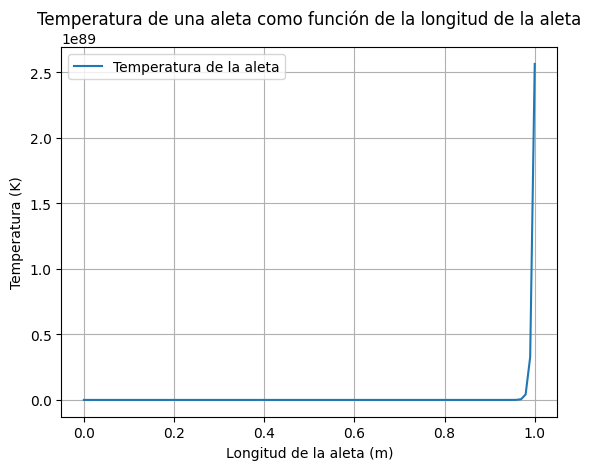

In [ ]:
# Grafico de temperatura de la aleta como función de la longitud de la aleta
plt.plot(x, T_n, label='Temperatura de la aleta')
plt.xlabel('Longitud de la aleta (m)')
plt.ylabel('Temperatura (K)')
plt.title('Temperatura de una aleta como función de la longitud de la aleta')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# solución analítica
def sol_analitica(x):
    return T_inf + (Tb - T_inf) * np.exp(-np.sqrt(h * p / (k * Ac)) * x)

# Calculando la temperatura analítica
T_a = sol_analitica(x)

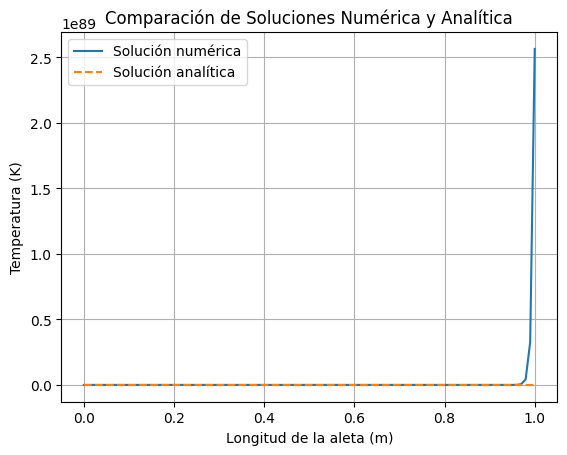

In [ ]:
# Graficando la solución numérica y analítica
plt.plot(x, T_n, label='Solución numérica')
plt.plot(x, T_a, label='Solución analítica',linestyle='dashed')
plt.xlabel('Longitud de la aleta (m)')
plt.ylabel('Temperatura (K)')
plt.title('Comparación de Soluciones Numérica y Analítica')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# posición x utilizando el método de Newton
def sol_analitica305(x):
    return T_inf + (Tb - T_inf) * np.exp(-np.sqrt(h * p / (k * Ac)) * x) - 305
x_solucion = newton(sol_analitica305, 0.5)


print(f"La posición de la aleta donde la temperatura es de 305K es x = {x_solucion:.5f} metros.")

La posición de la aleta donde la temperatura es de 305K es x = 0.50015 metros.


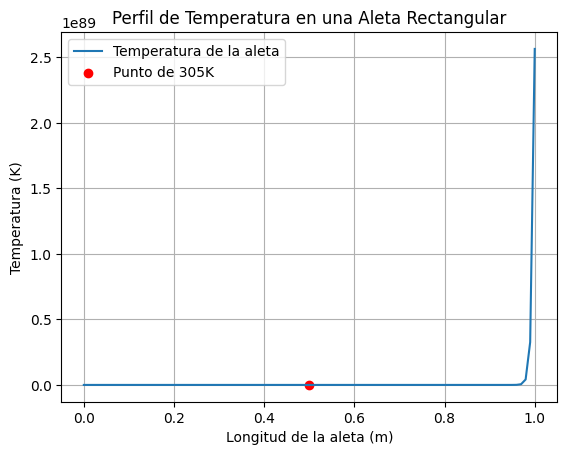

In [ ]:
# Graficando la solución numérica y resaltando el punto de 305K
plt.plot(x, T_n, label='Temperatura de la aleta')
plt.scatter(x_solucion, temperatura_deseada, color='red', label='Punto de 305K')
plt.xlabel('Longitud de la aleta (m)')
plt.ylabel('Temperatura (K)')
plt.title('Perfil de Temperatura en una Aleta Rectangular')
plt.legend()
plt.grid(True)
plt.show()